# Trabajo en clase 17 OCT 2024

Tenemos

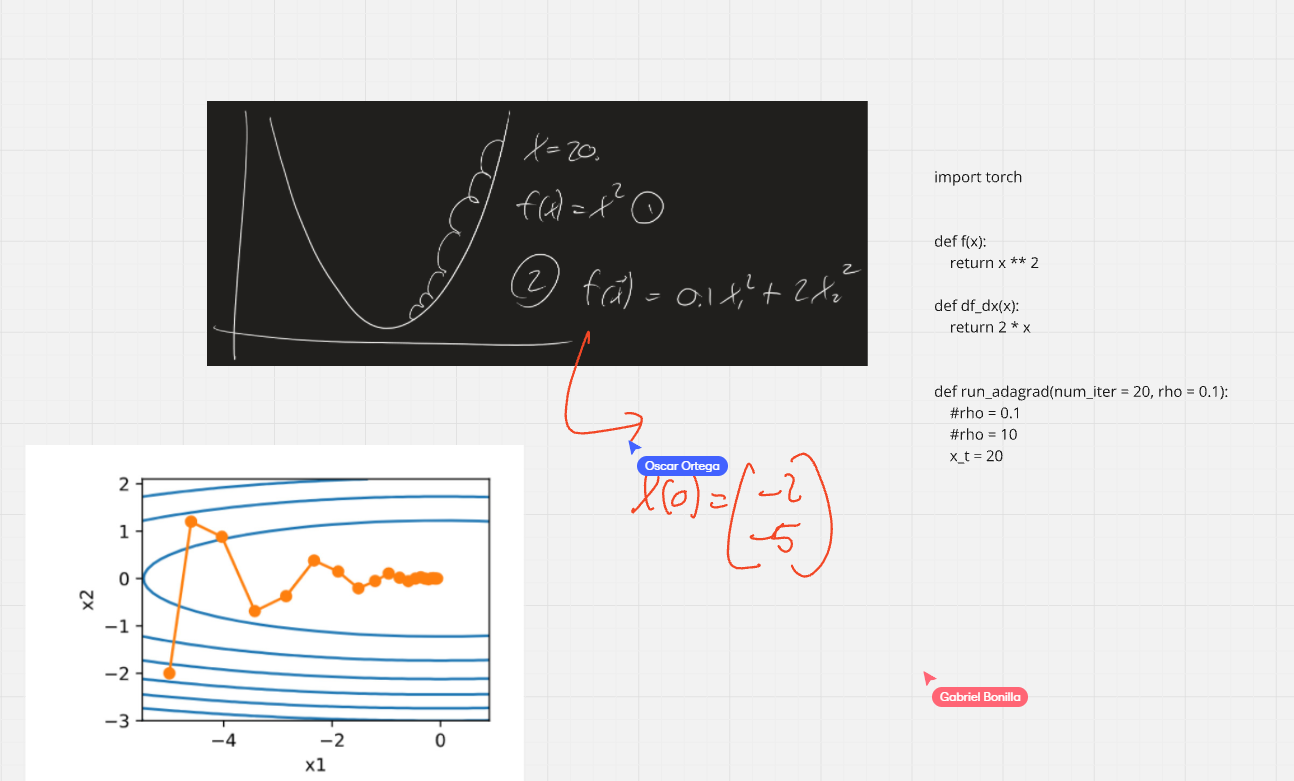

C:\Users\isvargas\AppData\Local\Temp\ipykernel_15648\1742745828.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x1_t = x1_t - (rho / (torch.sqrt(torch.tensor(grad_squared_accum_x1)) + epsilon)) * grad_x1
C:\Users\isvargas\AppData\Local\Temp\ipykernel_15648\1742745828.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x2_t = x2_t - (rho / (torch.sqrt(torch.tensor(grad_squared_accum_x2)) + epsilon)) * grad_x2


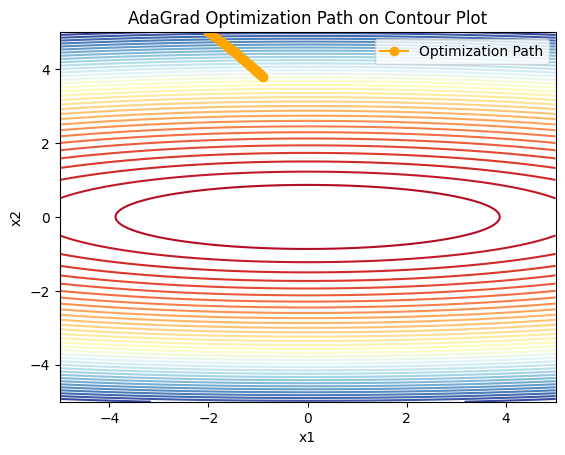

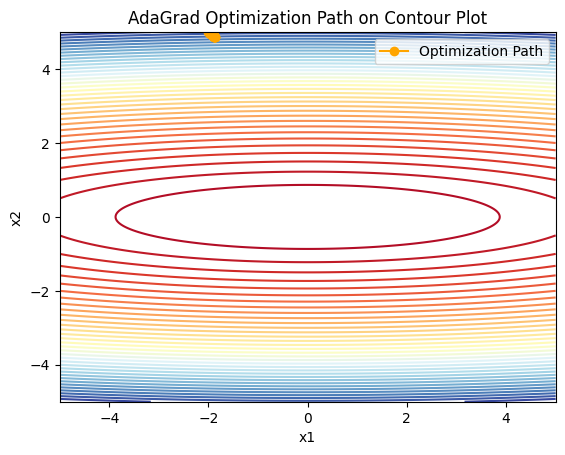

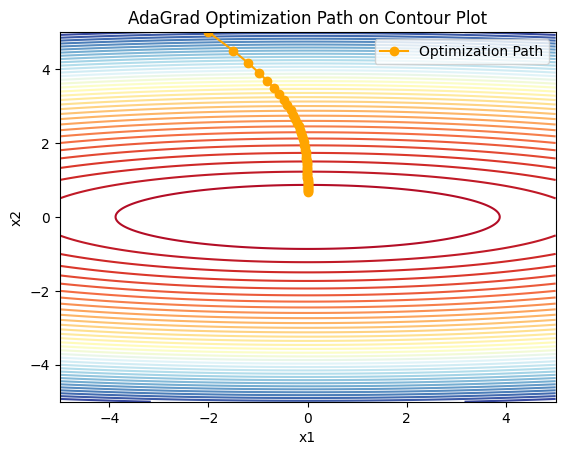

In [1]:
import torch

def f(x1, x2):
    """2D quadratic function."""
    return 0.1 * x1**2 + 2 * x2**2

def df_dx1(x1):
    """Derivative with respect to x1."""
    return 2 * 0.1 * x1

def df_dx2(x2):
    """Derivative with respect to x2."""
    return 2 * 2 * x2

def run_adagrad_2d(num_iter=50, rho=0.1, init_x1=-2, init_x2=5):
    """Run AdaGrad for 2D function."""
    x1_t = init_x1  # Initialize x1
    x2_t = init_x2  # Initialize x2
    epsilon = 1e-8  # Small constant to avoid division by zero
    grad_squared_accum_x1 = 0  # Accumulator for squared gradients of x1
    grad_squared_accum_x2 = 0  # Accumulator for squared gradients of x2

    path_x1 = [x1_t]
    path_x2 = [x2_t]

    for t in range(num_iter):
        # Compute gradients
        grad_x1 = df_dx1(x1_t)
        grad_x2 = df_dx2(x2_t)

        # Accumulate squared gradients
        grad_squared_accum_x1 += grad_x1 ** 2
        grad_squared_accum_x2 += grad_x2 ** 2

        # Update rule for x1 and x2
        x1_t = x1_t - (rho / (torch.sqrt(torch.tensor(grad_squared_accum_x1)) + epsilon)) * grad_x1
        x2_t = x2_t - (rho / (torch.sqrt(torch.tensor(grad_squared_accum_x2)) + epsilon)) * grad_x2

        # Store the path for visualization
        path_x1.append(x1_t.item())
        path_x2.append(x2_t.item())

    return path_x1, path_x2

import numpy as np
import matplotlib.pyplot as plt

def plot_contour_with_path(path_x1, path_x2):
    """Plot contour of the 2D function and optimization path."""
    # Generate grid of values for contour plot
    x1_vals = np.linspace(-5, 5, 400)
    x2_vals = np.linspace(-5, 5, 400)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = 0.1 * X1**2 + 2 * X2**2

    # Create the contour plot
    plt.contour(X1, X2, Z, levels=50, cmap='RdYlBu')

    # Plot the optimization path
    plt.plot(path_x1, path_x2, 'o-', color='orange', label='Optimization Path')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('AdaGrad Optimization Path on Contour Plot')
    plt.legend()
    plt.show()

# Run the AdaGrad optimizer for 2D function
path_x1, path_x2 = run_adagrad_2d()

# Plot the results
plot_contour_with_path(path_x1, path_x2)

# Experiment with a smaller learning rate
path_x1_small_rho, path_x2_small_rho = run_adagrad_2d(rho=0.01)
plot_contour_with_path(path_x1_small_rho, path_x2_small_rho)

# Experiment with a larger learning rate
path_x1_large_rho, path_x2_large_rho = run_adagrad_2d(rho=0.5)
plot_contour_with_path(path_x1_large_rho, path_x2_large_rho)


In [2]:
# Diego

import torch

def f(x):
    return x ** 2

def df_dx(x):
    return 2 * x

def run_adagrad(num_iter=20, rho=0.1, epsilon=1e-8):
    x_t = 20.0  # Initial value of x
    grad_squared_sum = 0.0  # Sum of squares of gradients (accumulation)
    alpha = 0.1  # Learning rate

    x_t_hist = []  # History of x values
    f_t_hist = []  # History of function values

    for t in range(num_iter):
        # Compute the gradient
        grad = df_dx(x_t)
        
        # Accumulate the squared gradients
        grad_squared_sum += grad ** 2
        
        # Compute the adjusted learning rate
        adjusted_lr = alpha / (torch.sqrt(torch.tensor(grad_squared_sum)) + epsilon)
        
        # Update the parameter
        x_t = x_t - adjusted_lr * grad

        # Save history
        x_t_hist.append(x_t)
        f_t_hist.append(f(x_t))

        # Print the iteration details
        print(f"Iteration {t+1}: x_t = {x_t:.4f}, f(x_t) = {f(x_t):.4f}")

    return x_t, x_t_hist, f_t_hist

# Run the Adagrad algorithm
run_adagrad()

Iteration 1: x_t = 19.9000, f(x_t) = 396.0100
Iteration 2: x_t = 19.8295, f(x_t) = 393.2077
Iteration 3: x_t = 19.7720, f(x_t) = 390.9306
Iteration 4: x_t = 19.7222, f(x_t) = 388.9662
Iteration 5: x_t = 19.6778, f(x_t) = 387.2150
Iteration 6: x_t = 19.6372, f(x_t) = 385.6213
Iteration 7: x_t = 19.5997, f(x_t) = 384.1498
Iteration 8: x_t = 19.5647, f(x_t) = 382.7769
Iteration 9: x_t = 19.5317, f(x_t) = 381.4857
Iteration 10: x_t = 19.5003, f(x_t) = 380.2634
Iteration 11: x_t = 19.4705, f(x_t) = 379.1005
Iteration 12: x_t = 19.4419, f(x_t) = 377.9894
Iteration 13: x_t = 19.4145, f(x_t) = 376.9240
Iteration 14: x_t = 19.3881, f(x_t) = 375.8992
Iteration 15: x_t = 19.3626, f(x_t) = 374.9110
Iteration 16: x_t = 19.3379, f(x_t) = 373.9559
Iteration 17: x_t = 19.3140, f(x_t) = 373.0309
Iteration 18: x_t = 19.2908, f(x_t) = 372.1335
Iteration 19: x_t = 19.2681, f(x_t) = 371.2614
Iteration 20: x_t = 19.2461, f(x_t) = 370.4127


C:\Users\isvargas\AppData\Local\Temp\ipykernel_15648\3418361743.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  adjusted_lr = alpha / (torch.sqrt(torch.tensor(grad_squared_sum)) + epsilon)


(tensor(19.2461),
 [tensor(19.9000),
  tensor(19.8295),
  tensor(19.7720),
  tensor(19.7222),
  tensor(19.6778),
  tensor(19.6372),
  tensor(19.5997),
  tensor(19.5647),
  tensor(19.5317),
  tensor(19.5003),
  tensor(19.4705),
  tensor(19.4419),
  tensor(19.4145),
  tensor(19.3881),
  tensor(19.3626),
  tensor(19.3379),
  tensor(19.3140),
  tensor(19.2908),
  tensor(19.2681),
  tensor(19.2461)],
 [tensor(396.0100),
  tensor(393.2077),
  tensor(390.9306),
  tensor(388.9662),
  tensor(387.2150),
  tensor(385.6213),
  tensor(384.1498),
  tensor(382.7769),
  tensor(381.4857),
  tensor(380.2634),
  tensor(379.1005),
  tensor(377.9894),
  tensor(376.9240),
  tensor(375.8992),
  tensor(374.9110),
  tensor(373.9559),
  tensor(373.0309),
  tensor(372.1335),
  tensor(371.2614),
  tensor(370.4127)])

C:\Users\isvargas\AppData\Local\Temp\ipykernel_15648\3839330198.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_t = x_t - (rho / (torch.sqrt(torch.tensor(grad_squared_accum)) + epsilon)) * grad


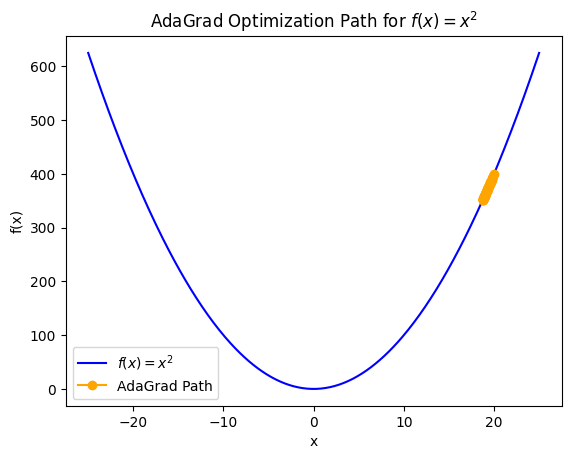

In [4]:
# x^2

import torch
import matplotlib.pyplot as plt
import numpy as np

# 1D function: f(x) = x^2
def f_x(x):
    return x ** 2

# Derivative of f(x) = x^2
def df_dx(x):
    return 2 * x

# AdaGrad for the 1D function f(x) = x^2
def run_adagrad_1d_x(num_iter=50, rho=0.1, init_x=20):
    x_t = init_x  # Initialize x
    epsilon = 1e-8  # Small constant to avoid division by zero
    grad_squared_accum = 0  # Accumulate squared gradients

    path_x = [x_t]

    for t in range(num_iter):
        # Compute gradient for x
        grad = df_dx(x_t)

        # Accumulate squared gradient for x
        grad_squared_accum += grad ** 2

        # Update x using AdaGrad rule
        x_t = x_t - (rho / (torch.sqrt(torch.tensor(grad_squared_accum)) + epsilon)) * grad

        # Store x value for visualization
        path_x.append(x_t.item())

    return path_x

# Plot the 1D function and optimization path
def plot_1d_function_with_path_x(path_x):
    # Generate values for plotting the function
    x_vals = np.linspace(-25, 25, 400)
    f_vals = x_vals**2

    # Create plot
    plt.plot(x_vals, f_vals, label=r'$f(x) = x^2$', color='blue')
    
    # Plot optimization path
    plt.plot(path_x, [f_x(x) for x in path_x], 'o-', color='orange', label='AdaGrad Path')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('AdaGrad Optimization Path for $f(x) = x^2$')
    plt.legend()
    plt.show()

# Run the AdaGrad optimizer for the 1D function f(x) = x^2
path_x = run_adagrad_1d_x()

# Plot the results
plot_1d_function_with_path_x(path_x)


C:\Users\isvargas\AppData\Local\Temp\ipykernel_15648\3130146391.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return - (self.lr / (torch.sqrt(torch.tensor(self.grad_squared_accum)) + self.epsilon)) * grad


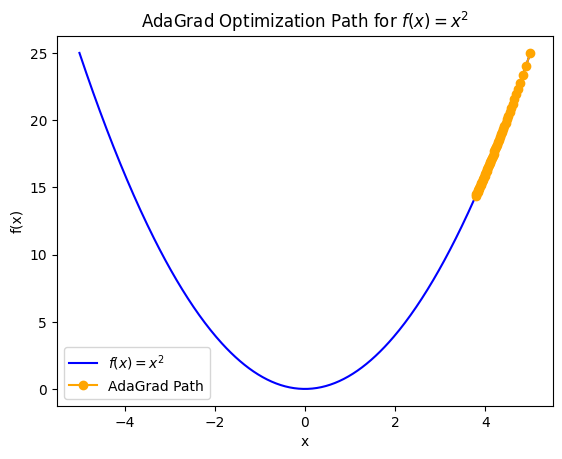

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Class-based design pattern for AdaGrad optimizer
class AdaGradOptimizer:
    def __init__(self, lr=0.1, epsilon=1e-8):
        self.lr = lr  # Learning rate
        self.epsilon = epsilon  # To avoid division by zero
        self.grad_squared_accum = 0  # Accumulation of squared gradients

    def step(self, grad):
        # Accumulate squared gradient
        self.grad_squared_accum += grad ** 2
        # AdaGrad update rule
        return - (self.lr / (torch.sqrt(torch.tensor(self.grad_squared_accum)) + self.epsilon)) * grad

# Function f(x) = x^2
def f(x):
    return x ** 2

# Gradient of f(x) = 2 * x
def df_dx(x):
    return 2 * x

# AdaGrad optimization for f(x) = x^2
def run_adagrad_1d(num_iter=50, lr=0.1, init_x=5):
    optimizer = AdaGradOptimizer(lr=lr)  # Initialize AdaGrad optimizer
    x_t = init_x  # Starting point for optimization

    path_x = [x_t]  # To store the trajectory

    for t in range(num_iter):
        grad = df_dx(x_t)  # Compute gradient
        x_t += optimizer.step(grad)  # Update x using AdaGrad step

        # Store the path for visualization
        path_x.append(x_t.item())

    return path_x

# Plot the 1D function and the optimization path
def plot_1d_function_with_path(path_x):
    # Generate values for plotting the function
    x_vals = np.linspace(-5, 5, 400)
    f_vals = x_vals ** 2

    # Create plot for the function
    plt.plot(x_vals, f_vals, label=r'$f(x) = x^2$', color='blue')

    # Plot optimization path
    plt.plot(path_x, [f(x) for x in path_x], 'o-', color='orange', label='AdaGrad Path')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('AdaGrad Optimization Path for $f(x) = x^2$')
    plt.legend()
    plt.show()

# Run AdaGrad on the 1D function f(x) = x^2
path_x = run_adagrad_1d()

# Plot the results
plot_1d_function_with_path(path_x)
